In [2]:
# Import pandas and numpy

import numpy as np 
import pandas as pd

# Import matplotlib and seaborn for plotting and to specify that graphs should be plotted inline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import libraries to generate models
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Type it in the first cell of your notebook, then your matplotlib plots will be included next to your codes. 
# Otherwise, include plt.show()

pd.set_option('display.max_rows', None)


In [5]:
# Read the csv file to store it under the name df

df=pd.read_csv("online_shoppers_intention.csv")

In [6]:
# Data Preprocessing

print(df.shape)
print(df.describe())
print(df.info())
df.head()

(12330, 18)
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000   

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
# Transform the data type of below mentioned features to object

df["OperatingSystems"] = df["OperatingSystems"].astype(object)
df["Browser"] = df["Browser"].astype(object)
df["Region"] = df["Region"].astype(object)
df["TrafficType"] = df["TrafficType"].astype(object)

In [8]:
#checking for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
#Function to plot Stacked bar plot of a feature with conversion rate/ success rate on secondary Y axis

def get_revenue_proportion_plot(col_name):
    revenue_proportion = df.groupby(col_name,as_index=True)['Revenue'].mean()
    revenue = pd.crosstab(df[col_name],df['Revenue'])
    revenue = pd.concat([revenue, revenue_proportion], axis=1)
    revenue[col_name] = revenue.index
    revenue = revenue.reset_index(drop=True)
    revenue.columns = ['False', 'True', 'Revenue', col_name]
    ax = revenue.plot(x=col_name,kind="bar", y=['False', 'True'], stacked=True, rot=0, ylabel="Traffic Count")
    ax2 = ax.twinx()
    revenue['Revenue'].plot(ax=ax2, color='k', marker='o')
    ax2.set_ylabel('Success Rate')
    ax2.hlines(y=revenue['Revenue'].mean(), xmin=0, xmax = 20, linewidth=2, color='r',linestyles='--')
    

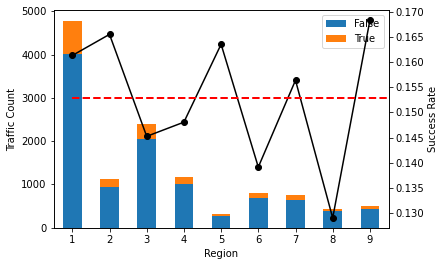

In [11]:
#region analysis
get_revenue_proportion_plot('Region')

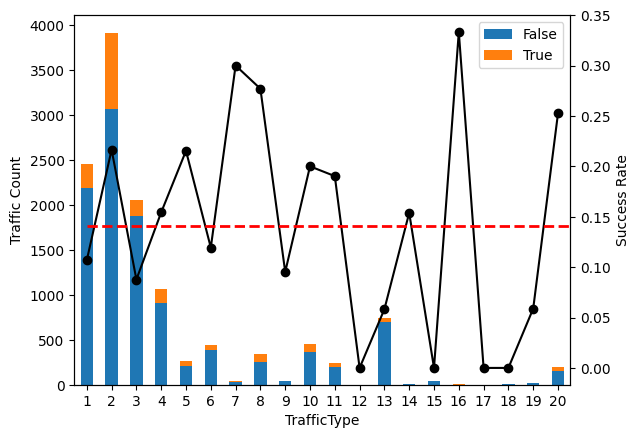

In [119]:
#TrafficType

get_revenue_proportion_plot('TrafficType')

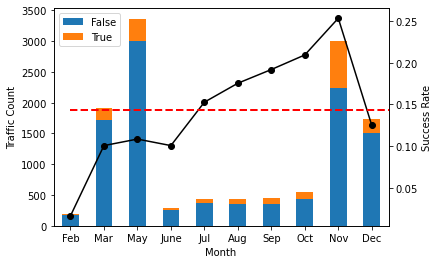

In [23]:
# Function to plot Stacked bar plot of a feature with conversion rate/success rate on secondary Y axis
def get_revenue_proportion_plot(col_name, df):
    # Mapping months to order
    month_order = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    # Map the 'Month' column to numerical values using the month_order dict
    if col_name == 'Month':
        df[col_name] = df[col_name].map(month_order)
        
    revenue_proportion = df.groupby(col_name, as_index=True)['Revenue'].mean().sort_index()
    revenue = pd.crosstab(df[col_name], df['Revenue'])
    revenue = pd.concat([revenue, revenue_proportion], axis=1)
    revenue[col_name] = revenue.index
    revenue = revenue.reset_index(drop=True)
    revenue.columns = ['False', 'True', 'Revenue', col_name]
    
    # Sort the dataframe by the column name which is 'Month' here
    if col_name == 'Month':
        revenue = revenue.sort_values(by=col_name)
        # Mapping back to month names for display purposes
        inverse_month_order = {number: month for month, number in month_order.items()}
        revenue[col_name] = revenue[col_name].map(inverse_month_order)
    
    ax = revenue.plot(x=col_name, kind="bar", y=['False', 'True'], stacked=True, rot=0, ylabel="Traffic Count")
    ax2 = ax.twinx()
    revenue['Revenue'].plot(ax=ax2, color='k', marker='o')
    ax2.set_ylabel('Success Rate')
    ax2.hlines(y=revenue['Revenue'].mean(), xmin=0, xmax = len(month_order)-1, linewidth=2, color='r', linestyles='--')
    plt.show()

# Example usage:
get_revenue_proportion_plot('Month', df)


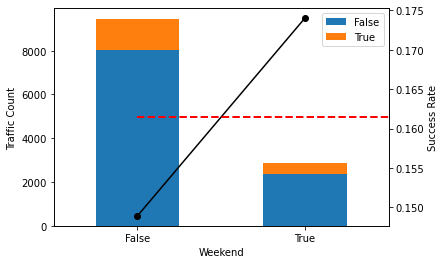

In [25]:
#Weekend
get_revenue_proportion_plot("Weekend", df)

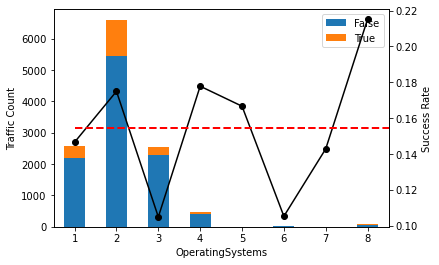

In [27]:
#Operating System
get_revenue_proportion_plot('OperatingSystems', df)

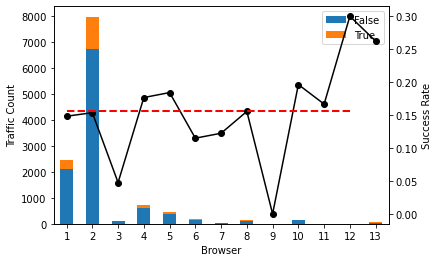

In [29]:
#Browser
get_revenue_proportion_plot('Browser', df)

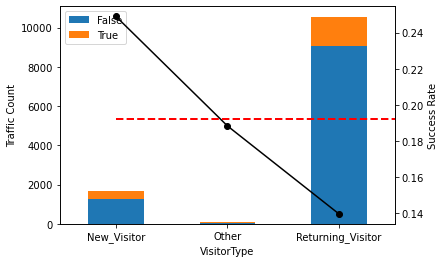

In [30]:
#Visitor Type
get_revenue_proportion_plot("VisitorType", df)

In [21]:
# Correlation matrix
#var = data.columns #['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF']


#my_corr_matrix = data.corr(numeric_only=True)

#my_corr_matrix

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [123]:
# plot a heatmap for the correlation matrix

#sns.heatmap(my_corr_matrix )

NameError: name 'my_corr_matrix' is not defined

In [124]:
#s = my_corr_matrix.unstack()
#so = s.sort_values(kind="quicksort")
#print(so)

NameError: name 'my_corr_matrix' is not defined

In [31]:
# Use MinMax scaler to scale numeric columns

df_scaled=df.copy()
scaler = MinMaxScaler()
scaled_col = ['Administrative','Administrative_Duration','Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
df_scaled[scaled_col] = MinMaxScaler().fit_transform(df_scaled[scaled_col])
df_scaled.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.0,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0.000000,0.0,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0.000000,0.0,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0.000000,0.0,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0.000000,0.0,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False
5,0.000000,0.0,0.0,0.0,0.026950,0.002411,0.078947,0.122807,0.0,0.0,2,2,2,1,3,Returning_Visitor,False,False
6,0.000000,0.0,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.0,0.4,2,2,4,3,3,Returning_Visitor,False,False
7,0.037037,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.0,2,1,2,1,5,Returning_Visitor,True,False
8,0.000000,0.0,0.0,0.0,0.002837,0.000578,0.000000,0.500000,0.0,0.8,2,2,2,2,3,Returning_Visitor,False,False
9,0.000000,0.0,0.0,0.0,0.004255,0.011536,0.000000,0.111111,0.0,0.4,2,2,4,1,2,Returning_Visitor,False,False


In [34]:
# Set target variable
y=df_scaled['Revenue']

# Transform the categorical variables into dummies or indicator variables

data = pd.get_dummies(df_scaled)
x_data=data.drop(['Revenue'], axis = 1)

# Split the data

x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)

# verify the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 65)
Shape of y_train : (8631,)
Shape of x_test : (3699, 65)
Shape of y_test : (3699,)


In [35]:
# Assuming X_train and y_train are your feature matrix and target variable respectively
# X_train.shape = (n_samples, n_features)
# y_train.shape = (n_samples,)
 
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)
 
# Resample the training data
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
 
# Check the shape of the resampled train data
print("Shape of resampled dataset:", x_train_resampled.shape, y_train_resampled.shape)
print("Shape of x_train_resampled:", x_train_resampled.shape)

Shape of resampled dataset: (14690, 65) (14690,)
Shape of x_train_resampled: (14690, 65)


In [36]:
# Logistic Regression
# Define function
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=10000)

# Train the classifier
logreg.fit(x_train_resampled, y_train_resampled)

# Predict target variable and the probability
y_pred_logreg=logreg.predict(x_test)
pred_prob = logreg.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of logistic regression classifier on train set: ', logreg.score(x_train_resampled, y_train_resampled))
print('Accuracy of logistic regression classifier on test set: ', logreg.score(x_test, y_test))
print("AUC for logistic regression:", roc_auc_score(y_test, pred_prob))


Accuracy of logistic regression classifier on train set:  0.8157249829816201
Accuracy of logistic regression classifier on test set:  0.8264395782643957
AUC for logistic regression: 0.875349418515341


In [47]:
print(logreg.coef_)
print(logreg.intercept_)


[[ 7.13324047e-01 -2.49187633e-02  1.54798367e+00  2.48124158e-01
   2.46460284e+00  3.00787199e+00  8.77089594e-02 -3.24641744e+00
   2.63316098e+01 -4.92762637e-01  1.03224333e-01 -2.14567874e-02
  -9.91130882e-02 -1.95083722e-02 -1.78312249e-01 -1.24254477e-01
  -5.78785622e-01 -1.44408792e-01  6.76061221e-01  3.42128753e-01
   1.24649233e-01  1.27973874e-01 -9.80963404e-01  2.57055783e-01
   1.79916516e-01 -2.20883329e-01  1.20260651e-01  2.74914435e-01
  -9.77151481e-02  6.71631612e-01 -5.78785622e-01  1.19110019e+00
  -1.19534742e+00  7.73970225e-02  1.21431412e-01  3.36168750e-02
   1.08166495e-01 -3.39211861e-01 -2.44369158e-01  7.21974108e-02
   1.72595780e-01 -1.28016604e-01  1.31338254e-02  1.19430474e-01
  -1.09569653e-01  2.13169102e-01  6.51793025e-01 -1.41277009e-01
   1.36570876e-01  6.31997098e-01  7.69707827e-02  2.26102588e-01
   3.66619256e-01 -1.01086539e-01 -4.50008264e-01 -7.54111322e-01
  -1.19011077e+00  1.43060473e+00 -6.12869747e-02 -8.49054925e-01
  -8.15144

In [53]:
print(np.exp(logreg.coef_))


[[2.04076359e+00 9.75389146e-01 4.70197985e+00 1.28161905e+00
  1.17588111e+01 2.02442741e+01 1.09167036e+00 3.89133680e-02
  2.72692288e+11 6.10936265e-01 1.10874011e+00 9.78771772e-01
  9.05640285e-01 9.80680685e-01 8.36681129e-01 8.83155069e-01
  5.60578708e-01 8.65533853e-01 1.96611836e+00 1.40794156e+00
  1.13275105e+00 1.13652331e+00 3.74949697e-01 1.29311726e+00
  1.19711742e+00 8.01810223e-01 1.12779077e+00 1.31641803e+00
  9.06907201e-01 1.95742848e+00 5.60578708e-01 3.29069963e+00
  3.02598806e-01 1.08047096e+00 1.12911192e+00 1.03418831e+00
  1.11423324e+00 7.12331518e-01 7.83198457e-01 1.07486751e+00
  1.18838564e+00 8.79838770e-01 1.01322045e+00 1.12685490e+00
  8.96219738e-01 1.23759391e+00 1.91897852e+00 8.68248766e-01
  1.14633612e+00 1.88136410e+00 1.08001052e+00 1.25370427e+00
  1.44284846e+00 9.03854810e-01 6.37622882e-01 4.70428489e-01
  3.04187567e-01 4.18122696e+00 9.40553286e-01 4.27819062e-01
  4.42575541e-01 1.61456438e+00 1.09444181e+00 8.97646263e-01
  8.9721

In [37]:
# Evaluate confusion matrix
my_matrix_logreg = confusion_matrix(y_test, y_pred_logreg) 
print("TP is:", my_matrix_logreg[1,1])
print("TN is:", my_matrix_logreg[0,0])
print("FP is:", my_matrix_logreg[0,1])
print("FN is:", my_matrix_logreg[1,0])



TP is: 453
TN is: 2604
FP is: 473
FN is: 169


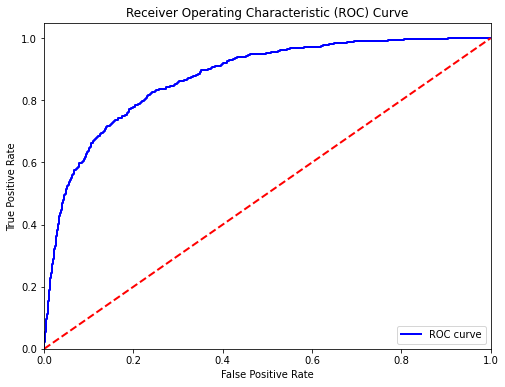

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [141]:
# Naive Bayes Classifier
# Define function
cat_nb = CategoricalNB(alpha = 1, min_categories=362) 

# Train the classifier 
cat_nb.fit(x_train_resampled, y_train_resampled) 

# Predict target variable and the probability
y_pred_nb = cat_nb.predict(x_test)
pred_prob = cat_nb.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of naive bayes classifier on train set: ', cat_nb.score(x_train_resampled,y_train_resampled))
print('Accuracy of naive bayes classifier on test set: ', cat_nb.score(x_test, y_test))
print("AUC for NB regression:", roc_auc_score(y_test, pred_prob))

Accuracy of naive bayes classifier on train set:  0.6543907420013615
Accuracy of naive bayes classifier on test set:  0.6334144363341444
AUC for NB regression: 0.7028236673504384


In [142]:
# Evaluate confusion matrix
my_matrix_nb = confusion_matrix(y_test, y_pred_nb) #Modle evaluation
print("TP is:", my_matrix_nb[1,1])
print("TN is:", my_matrix_nb[0,0])
print("FP is:", my_matrix_nb[0,1])
print("FN is:", my_matrix_nb[1,0])

TP is: 419
TN is: 1924
FP is: 1153
FN is: 203


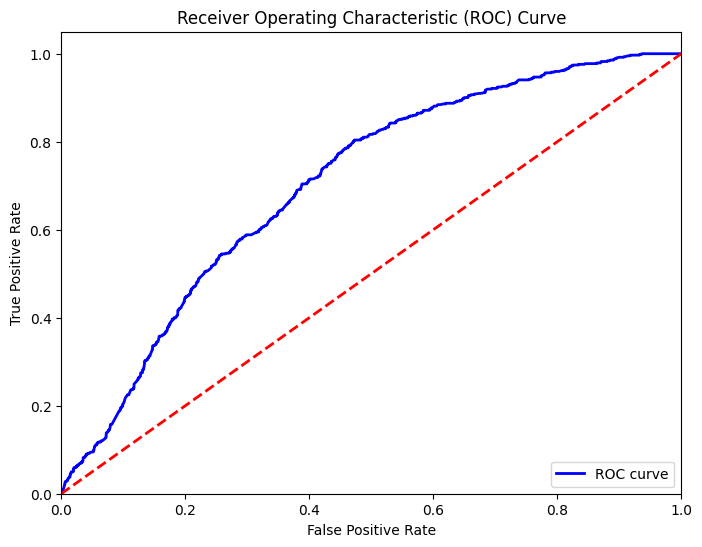

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [54]:
# Decision Tree
# Define function
opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# Go through all possible combinations: 9*9*9 models, with 5 fold cv??
# Define parameters
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), 
             'max_leaf_nodes':    range(2,10)   }

# Create function with gridsearch and cross validation
grid_tree = GridSearchCV(opt_tree, dt_params, scoring = 'roc_auc')

# Train classifier
grid_tree.fit(x_train_resampled, y_train_resampled)

# Predict target variable and the probability
y_pred_dt = grid_tree.predict(x_test)
pred_prob = grid_tree.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of Decision Tree classifier on train set: ', grid_tree.score(x_train_resampled,y_train_resampled))
print('Accuracy of Decision Tree classifier on test set: ', grid_tree.score(x_test, y_test))
print("AUC for Decision Tree:", roc_auc_score(y_test, pred_prob))
print("Accuracy:", grid_tree.best_score_) #mean validation accuracy
print(grid_tree.best_params_)

Accuracy of Decision Tree classifier on train set:  0.9252407063890404
Accuracy of Decision Tree classifier on test set:  0.9083321751361362
AUC for Decision Tree: 0.9083321751361362
Accuracy: 0.9217471492765623
{'max_depth': 6, 'max_leaf_nodes': 9, 'min_samples_split': 2}


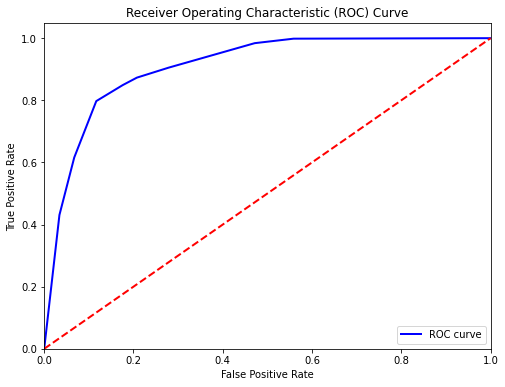

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [56]:
print(grid_tree.best_estimator_.score(x_test, y_test))

0.8283319816166531


In [57]:
# Evaluate confusion matrix
my_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("TP is:", my_matrix_dt[1,1])
print("TN is:", my_matrix_dt[0,0])
print("FP is:", my_matrix_dt[0,1])
print("FN is:", my_matrix_dt[1,0])

TP is: 528
TN is: 2536
FP is: 541
FN is: 94


In [58]:
print(tree.export_text(grid_tree.best_estimator_)) 

|--- feature_8 <= 0.00
|   |--- feature_10 <= 6.50
|   |   |--- class: False
|   |--- feature_10 >  6.50
|   |   |--- feature_5 <= 0.04
|   |   |   |--- feature_62 <= 0.50
|   |   |   |   |--- feature_10 <= 11.50
|   |   |   |   |   |--- feature_3 <= 0.00
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- feature_3 >  0.00
|   |   |   |   |   |   |--- class: False
|   |   |   |   |--- feature_10 >  11.50
|   |   |   |   |   |--- class: False
|   |   |   |--- feature_62 >  0.50
|   |   |   |   |--- class: False
|   |   |--- feature_5 >  0.04
|   |   |   |--- class: True
|--- feature_8 >  0.00
|   |--- feature_6 <= 0.00
|   |   |--- class: True
|   |--- feature_6 >  0.00
|   |   |--- feature_10 <= 10.50
|   |   |   |--- class: True
|   |   |--- feature_10 >  10.50
|   |   |   |--- class: True



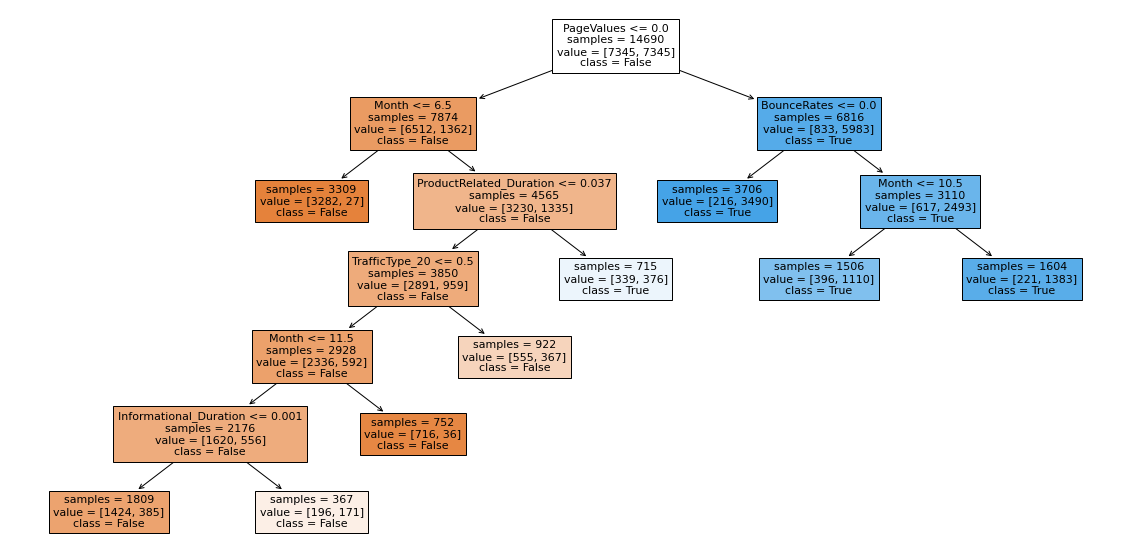

In [59]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) 
class_names = df['Revenue'].astype(str).unique().tolist()
tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = data.columns.tolist(), # specify variable names 
               class_names = class_names, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read # impurity = False means we don't need the IG or Gini
plt.show()

In [150]:
# Random Forest

rf = RandomForestClassifier(bootstrap=True, random_state = 42) 
dt_params_3 = {'n_estimators':np.arange(100,800,100),'max_samples':np.arange(100,800,100)}
grid_rf_tree = GridSearchCV(rf, dt_params_3,cv=5, scoring='roc_auc', n_jobs=2)
grid_rf_tree.fit(x_train_resampled, y_train_resampled)
# estimator dropped, estimator will be tree
y_pred_rf = grid_rf_tree.predict(x_test)
print('Accuracy of random forest classifier on train set: ', grid_rf_tree.score(x_train_resampled, y_train_resampled))
print('Accuracy of random forest classifier on test set: ', grid_rf_tree.score(x_test, y_test))
pred_prob = grid_rf_tree.predict_proba(x_test)[:,1]
print("AUC for random forest classifier:", roc_auc_score(y_test, pred_prob))


Accuracy of random forest classifier on train set:  0.9707480348347352
Accuracy of random forest classifier on test set:  0.9210227943658323
AUC for random forest classifier: 0.9210227943658323


In [151]:
my_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("TP is:", my_matrix_rf[1,1])
print("TN is:", my_matrix_rf[0,0])
print("FP is:", my_matrix_rf[0,1])
print("FN is:", my_matrix_rf[1,0])

TP is: 522
TN is: 2661
FP is: 416
FN is: 100


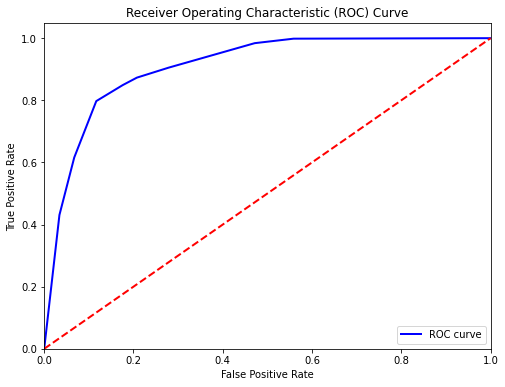

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [61]:
# Adaboost Ensemble Classifier 

dt1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
dt_params2 = {'learning_rate':  np.arange(0,1.1,0.1)}
adaboost = AdaBoostClassifier(dt1, n_estimators = 500, random_state = 42)
grid_ada_tree = GridSearchCV(adaboost, dt_params2,cv=5,n_jobs=2)
grid_ada_tree.fit(x_train_resampled, y_train_resampled)


y_pred_ada=grid_ada_tree.predict(x_test)
pred_prob = grid_ada_tree.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of adaboost classifier on train set: ', grid_ada_tree.score(x_train_resampled, y_train_resampled))
print('Accuracy of adaboost classifier on test set: ', grid_ada_tree.best_estimator_.score(x_test, y_test))
print("AUC for Adaboost:", roc_auc_score(y_test, pred_prob))
print("Best learning rate:", grid_ada_tree.best_params_)

Accuracy of adaboost classifier on train set:  0.8662355343771273
Accuracy of adaboost classifier on test set:  0.8591511219248446
AUC for Adaboost: 0.8942647816441247
Best learning rate: {'learning_rate': 1.0}


In [154]:
print("AUC for random adaboost classifier:", roc_auc_score(y_test, pred_prob))
# Evaluate confusion matrix
my_matrix_adaboost = confusion_matrix(y_test, y_pred_ada)
print("TP is:", my_matrix_adaboost[1,1])
print("TN is:", my_matrix_adaboost[0,0])
print("FP is:", my_matrix_adaboost[0,1])
print("FN is:", my_matrix_adaboost[1,0])

AUC for random adaboost classifier: 0.8941958123072647
TP is: 479
TN is: 2686
FP is: 391
FN is: 143


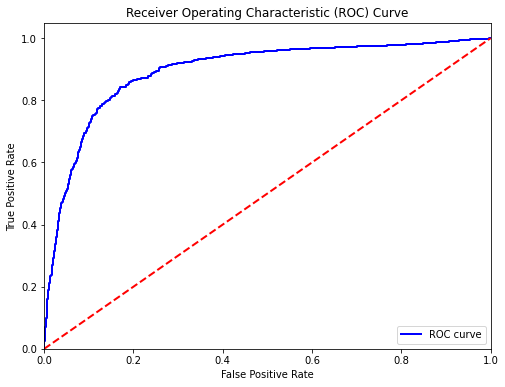

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [156]:
# Linear SVM with GridSearchCV

lr_svc = LinearSVC(random_state = 0, max_iter=10000)
params_svc = {'C': [0.01, 0.1, 1, 10]}
grid_lrsvc = GridSearchCV(lr_svc, params_svc, scoring = 'roc_auc', n_jobs = 2 )
grid_lrsvc.fit(x_train_resampled, y_train_resampled)
y_pred_lrsvc=grid_lrsvc.predict(x_test)
#pred_prob = grid_lrsvc.predict_proba(x_test)[:,1]
print('Accuracy of linear SVC on train set: ', grid_lrsvc.score(x_train_resampled, y_train_resampled))
print('Accuracy of linear SVC on test set: ', grid_lrsvc.score(x_test, y_test))
#print("AUC for linear SVC:", roc_auc_score(y_test, pred_prob))
print("Best parameter 'C':", grid_lrsvc.best_params_)

Accuracy of linear SVC on train set:  0.9112612507825675
Accuracy of linear SVC on test set:  0.8890727490655177
Best parameter 'C': {'C': 10}


In [157]:
print(grid_lrsvc.best_estimator_.score(x_test, y_test)) #with scoring method as accuracy of best model
print("Best parameter 'C':", grid_lrsvc.best_params_) #with scoring method as auc
#can not find AUC score as SVC doesnot have prodict proba, so we use decision_scores
print("Mean validation Accuracy:", grid_lrsvc.best_score_)
decision_scores = grid_lrsvc.decision_function(x_test)
auc_score = roc_auc_score(y_test, decision_scores)
print("AUC score:", auc_score)

0.838875371722087
Best parameter 'C': {'C': 10}
Mean validation Accuracy: 0.9091678672598811
AUC score: 0.8890727490655177


In [158]:
my_matrix_lrsvc = confusion_matrix(y_test, y_pred_lrsvc)
print("TP is:", my_matrix_lrsvc[1,1])
print("TN is:", my_matrix_lrsvc[0,0])
print("FP is:", my_matrix_lrsvc[0,1])
print("FN is:", my_matrix_lrsvc[1,0])

TP is: 462
TN is: 2641
FP is: 436
FN is: 160


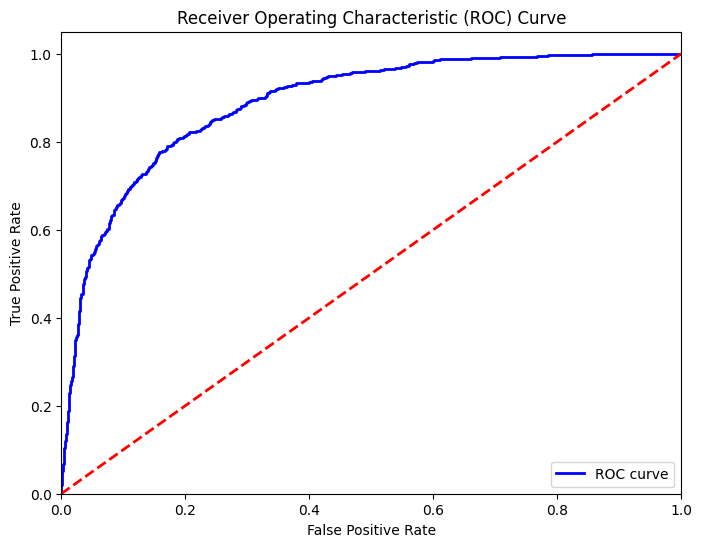

In [159]:
from sklearn.metrics import roc_auc_score, roc_curve
decision_scores = grid_lrsvc.decision_function(x_test)#Get the decision scores (signed distances to the hyperplane)
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [160]:
# Kernal SVM with GridSearchCV

svc = SVC(random_state = 0, kernel = 'rbf')
param_svc_kernel = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000]  ,
                    'gamma': [0.0001, 0.001,0.001,0.1,1,10]     }
grid_svc = GridSearchCV(svc, param_svc_kernel, cv = 5, scoring = 'roc_auc', n_jobs=2)
grid_svc.fit(x_train_resampled, y_train_resampled)
y_pred_kernel = grid_svc.predict(x_test)
print('Accuracy for kernel SVM on train set:',grid_svc.score(x_train_resampled, y_train_resampled))
print('Accuracy for kernel SVM on test set:',grid_svc.score(x_test, y_test))
print("Best parameters:", grid_svc.best_params_)

In [ ]:
print(grid_svc.best_estimator_.score(x_test, y_test)) #based on accuracy
print("Best parameter:", grid_lrsvc.best_params_) #with scoring method as accuracy of best model
print("Accuracy:", grid_svc.best_score_) #mean validation accuracy, should go with which ever has heighest of it
decision_scores = grid_svc.decision_function(x_test)

# Calculate AUC using decision scores
auc_score = roc_auc_score(y_test, decision_scores)
print("AUC score:", auc_score)

In [ ]:
my_matrix_kernel = confusion_matrix(y_test, y_pred_kernel)
print("TP is:", my_matrix_kernel[1,1])
print("TN is:", my_matrix_kernel[0,0])
print("FP is:", my_matrix_kernel[0,1])
print("FN is:", my_matrix_kernel[1,0])

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import numpy as np

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,60,20), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(x_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_mlp = mlp.predict(x_test)
pred_prob = mlp.predict_proba(x_test)[:, 1]

# Calculate accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred_mlp)
auc_score = roc_auc_score(y_test, pred_prob)

print("Test Accuracy:", accuracy)
print("AUC for nn:", auc_score)




In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix:")
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

# Define a pipeline with PCA and Random Forest
pipe_rf_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),  # Adjust the number of components as needed
    ('rf', RandomForestClassifier(bootstrap=True, random_state=42))
])

# Define parameters to search
param_grid_rf_pca = {
    'rf__n_estimators': np.arange(100, 800, 100),
    'rf__max_samples': np.arange(100, 800, 100)
}

# Perform grid search
grid_rf_pca = GridSearchCV(pipe_rf_pca, param_grid_rf_pca, cv=5, scoring='roc_auc', n_jobs=2)
grid_rf_pca.fit(x_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf_pca = grid_rf_pca.predict(x_test)
pred_prob_rf_pca = grid_rf_pca.predict_proba(x_test)[:, 1]

# Print the results
print('Accuracy of Random Forest classifier with PCA on train set:', grid_rf_pca.score(x_train_resampled, y_train_resampled))
print('Accuracy of Random Forest classifier with PCA on test set:', grid_rf_pca.score(x_test, y_test))
print("AUC for Random Forest classifier with PCA:", roc_auc_score(y_test, pred_prob_rf_pca))


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate FPR and TPR
fpr_rf_pca, tpr_rf_pca, thresholds_rf_pca = roc_curve(y_test, pred_prob_rf_pca)



# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_pca, tpr_rf_pca, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest with PCA')
plt.legend(loc='lower right')
plt.show()

